# Deep Learning - Assignment 1

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

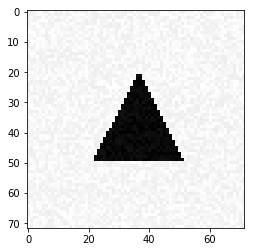

In [2]:
# On some implementations of matplotlib, you may need to change this value
IMAGE_SIZE = 72

def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_rectangle(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V, noise)


def generate_a_disk(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, noise)

def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]


im = generate_a_rectangle(10, True)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

im = generate_a_disk(10)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

[im, v] = generate_a_triangle(20, False)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')


def generate_dataset_classification(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        if i % 100 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle(noise, free_location)
        elif category == 1: 
            X[i] = generate_a_disk(noise, free_location)
        else:
            [X[i], V] = generate_a_triangle(noise, free_location)
        Y[i] = category
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

def generate_test_set_classification():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_classification(300, 20, True)
    Y_test = np_utils.to_categorical(Y_test, 3) 
    return [X_test, Y_test]

def generate_dataset_regression(nb_samples, noise=0.0):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        [X[i], Y[i]] = generate_a_triangle(noise, True)
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

In [3]:
import matplotlib.patches as patches

def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((IMAGE_SIZE,IMAGE_SIZE))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

    plt.show()

def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300, 20)
    return [X_test, Y_test]

In [20]:
#We generate the 300 rows Dataset for the figures using the function given
[X_train, Y_train] = generate_dataset_classification(300, 20)

Creating data:
0
100
200


In [21]:
Y_train

array([1., 0., 1., 2., 1., 2., 2., 2., 1., 0., 1., 0., 1., 2., 0., 0., 2.,
       0., 0., 0., 2., 1., 0., 0., 2., 1., 0., 1., 0., 0., 1., 2., 1., 1.,
       1., 0., 1., 0., 0., 2., 2., 1., 1., 1., 1., 0., 0., 1., 0., 2., 2.,
       1., 0., 0., 2., 2., 2., 1., 2., 2., 0., 2., 2., 0., 0., 1., 2., 0.,
       1., 0., 2., 1., 2., 1., 1., 1., 1., 2., 0., 2., 1., 0., 2., 1., 1.,
       0., 0., 2., 2., 1., 2., 1., 2., 2., 0., 0., 2., 0., 2., 1., 1., 1.,
       1., 2., 0., 2., 2., 0., 0., 1., 2., 0., 0., 0., 0., 2., 1., 0., 2.,
       0., 2., 2., 2., 1., 1., 1., 0., 1., 1., 2., 0., 1., 2., 0., 2., 1.,
       0., 2., 1., 2., 2., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 2., 1.,
       2., 1., 0., 0., 2., 1., 1., 2., 2., 0., 1., 1., 2., 0., 0., 1., 0.,
       1., 2., 2., 0., 1., 1., 2., 2., 0., 0., 2., 0., 0., 2., 2., 0., 2.,
       2., 2., 1., 2., 1., 2., 1., 2., 0., 1., 0., 1., 1., 0., 2., 1., 0.,
       1., 0., 1., 2., 0., 1., 0., 1., 0., 0., 2., 1., 0., 1., 0., 1., 1.,
       1., 0., 1., 0., 0.

(300, 5184)


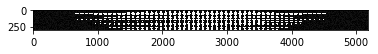

In [22]:
#Here we can see the array that we have. The 300 hundred rows of our data set for 5184 colums representing each pixel.
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
plt.imshow(X_train, cmap = cm.Greys)
print(X_train.shape)

In [23]:
#Reshaping Y_train to categorical values based on the type of figure that we have.
# [0] = Rectangle, [1] = Disk, [2] = Triangle
from keras.utils import np_utils
Y_train = np_utils.to_categorical(Y_train, 3)
print(Y_train)
Y_train.shape

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0.

(300, 3)

# 3.1 Building a Linear Classifier with Gradient Descent Optimizer

In [24]:
# Imports components from Keras
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization

# Initializes a sequential model considering two simple Perceptrons to work in the Classifier with SGD.
model_sgd = Sequential()
# First layer
model_sgd.add(BatchNormalization(input_shape=(IMAGE_SIZE**2,)))
model_sgd.add(Dense(1024, activation='relu', input_shape=(5184,)))
# Output layer
model_sgd.add(Dense(3, activation='softmax'))

In [25]:
# Compile the model for an Stochastic Gradient Optimizer
model_sgd.compile(optimizer='SGD', loss='mean_squared_error')

In [26]:
# Fit the model
model_sgd.fit(X_train,Y_train, validation_split=0.2, epochs=20, batch_size = 32)

Train on 240 samples, validate on 60 samples
Epoch 1/20
240/240 [==============================] - 1s 3ms/step - loss: 0.1960 - val_loss: 0.1553
Epoch 2/20
240/240 [==============================] - 0s 1ms/step - loss: 0.0966 - val_loss: 0.1093
Epoch 3/20
240/240 [==============================] - 0s 1ms/step - loss: 0.0630 - val_loss: 0.0885
Epoch 4/20
240/240 [==============================] - 0s 1ms/step - loss: 0.0498 - val_loss: 0.0700
Epoch 5/20
240/240 [==============================] - 0s 1ms/step - loss: 0.0383 - val_loss: 0.0563
Epoch 6/20
240/240 [==============================] - 0s 1ms/step - loss: 0.0288 - val_loss: 0.0492
Epoch 7/20
240/240 [==============================] - 0s 1ms/step - loss: 0.0250 - val_loss: 0.0429
Epoch 8/20
240/240 [==============================] - 0s 1ms/step - loss: 0.0210 - val_loss: 0.0407
Epoch 9/20
240/240 [==============================] - 0s 1ms/step - loss: 0.0156 - val_loss: 0.0356
Epoch 10/20
240/240 [==============================] - 

In [27]:
#To check the classifier, we apply the following code
X_test = generate_a_disk()

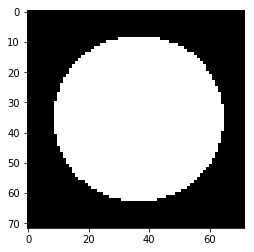

In [28]:
#Plot the image before the Prediction
plt.imshow(X_test.reshape(72,72), cmap = cm.Greys)
X_test = X_test.reshape(1, X_test.shape[0])
result_predict = model_sgd.predict(X_test)

In [29]:
#Show the results of the prediction in the classification array
result_predict

array([[0., 1., 0.]], dtype=float32)

As we can see in the result, we have a disk as a prediction, that in this case is correct. We have a really low lost, but probably there is a very little chance to have a bad prediction (because we have a minimum lost). The cases of prediction are really good in general.

# 3.2 Building a Linear Classifier with Adam Optimizer

In [30]:
# Initializes a sequential model considering two simple Perceptrons to work in the Classifier with Adam.
model_ada = Sequential()
# First layer
model_ada.add(BatchNormalization(input_shape=(IMAGE_SIZE**2,)))
model_ada.add(Dense(1024, activation='relu', input_shape=(5184,)))
# Output layer
model_ada.add(Dense(3, activation='softmax'))

# Compile the model for an Adam Optimizer
model_ada.compile(optimizer='Adam', loss='mean_squared_error')

In [31]:
# Fit the model
model_ada.fit(X_train,Y_train, validation_split=0.2, epochs=10, batch_size = 32)

Train on 240 samples, validate on 60 samples
Epoch 1/10
240/240 [==============================] - 1s 5ms/step - loss: 0.1772 - val_loss: 0.1866
Epoch 2/10
240/240 [==============================] - 1s 2ms/step - loss: 0.1639 - val_loss: 0.2186
Epoch 3/10
240/240 [==============================] - 1s 2ms/step - loss: 0.1770 - val_loss: 0.2196
Epoch 4/10
240/240 [==============================] - 1s 2ms/step - loss: 0.1237 - val_loss: 0.1997
Epoch 5/10
240/240 [==============================] - 1s 2ms/step - loss: 0.1127 - val_loss: 0.1778
Epoch 6/10
240/240 [==============================] - 1s 2ms/step - loss: 0.0968 - val_loss: 0.1706
Epoch 7/10
240/240 [==============================] - 1s 2ms/step - loss: 0.0904 - val_loss: 0.1333
Epoch 8/10
240/240 [==============================] - 1s 2ms/step - loss: 0.0665 - val_loss: 0.0665
Epoch 9/10
240/240 [==============================] - 1s 2ms/step - loss: 0.0760 - val_loss: 0.0675
Epoch 10/10
240/240 [==============================] - 

In [32]:
#Predict with the Adam Optimizer
result_predict_ada = model_ada.predict(X_test)
result_predict

array([[0., 1., 0.]], dtype=float32)

As we can see in the result, we have a disk as a prediction, that in this case is correct. We have a really low lost, but probably there is a very little chance to have a bad prediction (because we have a minimum lost). The cases of prediction are really good in general.

# 4 Visualization of the Solution

In [33]:
#As we can see here, we will get the weights of our previous model. In this case for the SGD.
model_sgd.get_weights()

[array([0.9999822, 1.0000386, 1.0000728, ..., 1.0000284, 1.0000442,
        0.9999677], dtype=float32),
 array([-9.2953638e-07,  5.3379197e-05,  1.0481733e-05, ...,
         5.4242018e-06,  9.5338990e-05,  5.2367222e-06], dtype=float32),
 array([0.9660728 , 0.9659802 , 0.96734434, ..., 0.96506894, 0.96582097,
        0.9672595 ], dtype=float32),
 array([0.00038832, 0.00037463, 0.00038525, ..., 0.00037925, 0.00038468,
        0.000355  ], dtype=float32),
 array([[-0.00349628, -0.01307057,  0.0286564 , ..., -0.02315567,
          0.00895266,  0.00684507],
        [ 0.00303493, -0.00565594,  0.01750384, ...,  0.02640566,
          0.01047962, -0.01759041],
        [-0.02761527, -0.00834715,  0.01918482, ..., -0.01541268,
          0.00255538, -0.00123821],
        ...,
        [-0.01755512,  0.02549068,  0.00849414, ..., -0.0197747 ,
          0.02095843,  0.00251716],
        [ 0.02898517, -0.00579809,  0.00688015, ...,  0.02238258,
          0.0068811 , -0.01338447],
        [-0.0293308

In [34]:
#We can see that each of the rows in weights() represent first the input and then each interaction and output
#for the next layer. In this case, based on the arquitecture we have the row 4 is the one that has our output.
#We show here the outputs of how the information goes inside (weights[0]) and then the output (weights[4]).

weights_sgd = model_sgd.get_weights()
weights_sgd[0].shape

(5184,)

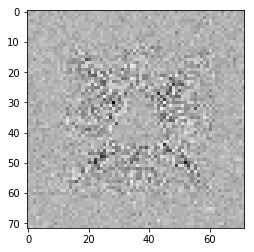

In [35]:
#We get the weights distributed in the neurons when they get inside the network (1st layer).
plt.imshow(weights_sgd[0].reshape(72,72), cmap = cm.Greys)

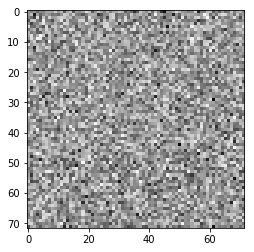

In [36]:
#Here we show the column that is the result of the first layer.
plt.imshow(weights_sgd[1].reshape(72,72), cmap = cm.Greys)

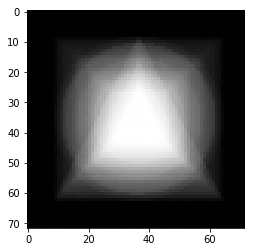

In [37]:
#Here we show the column that is the result to do the classification output.
plt.imshow(weights_sgd[2].reshape(72,72), cmap = cm.Greys)

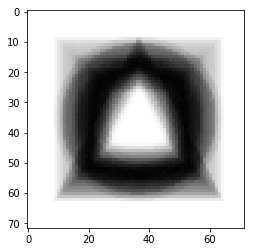

In [38]:
#Here we show the three columns that are the result to do the classification output.
plt.imshow(weights_sgd[3].reshape(72,72), cmap = cm.Greys)

In [39]:
#Now we take the weights from the Ada model.
weights_ada = model_ada.get_weights()
weights_ada[0].shape

(5184,)

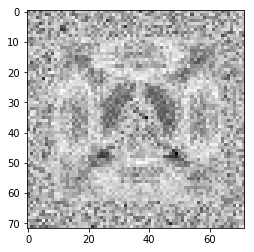

In [40]:
#We get the weights distributed in the neurons when they get inside the network (1st layer).
plt.imshow(weights_ada[0].reshape(72,72), cmap = cm.Greys)

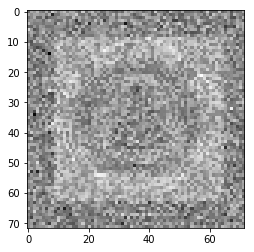

In [41]:
#Here we show the column result of the first layer.
plt.imshow(weights_ada[1].reshape(72,72), cmap = cm.Greys)

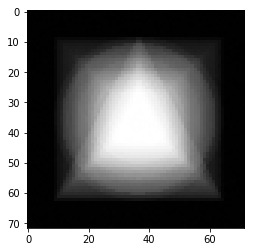

In [42]:
#Here we show the column that is the result to do the classification output.
plt.imshow(weights_ada[2].reshape(72,72), cmap = cm.Greys)

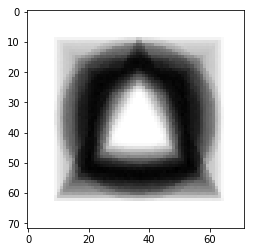

In [43]:
#Here we show the column that is the result to do the classification output.
plt.imshow(weights_ada[3].reshape(72,72), cmap = cm.Greys)

We showed (as we commented with the #) that each level of weights has an input and each interaction of the network. In this case we can see how it changes between each layer and the interaction between them (input-output) and finally getting a correct result in most of the cases.

There is not too much difference (in this case) between SGD and ADAM, except in the layer that interacts with the output layer

# 5 A More Difficult Classification Problem

In [228]:
#We generate the training set for the Classification Problem
[X_train_5, Y_train_5] = generate_dataset_classification(300, 20, True)

#We also generate the Test Set for the Classification Problem
[X_test_5, Y_test_5] = generate_test_set_classification()

Creating data:
0
100
200
Creating data:
0
100
200


In [229]:
#We see the shape that our training has.
X_train_5.shape

(300, 5184)

In [230]:
#We need to reshape the X and Y for Train and Test according to our new model.
X_train_5 = X_train_5.reshape(X_train_5.shape[0],72,72,1)
Y_train_5 = np_utils.to_categorical(Y_train_5, 3)

#We reshape the Test data to use it later for the predictions. Y_Test_5 is always reshape inside the function, so it's
#not required here.
X_test_5 = X_test_5.reshape(X_test_5.shape[0],72,72,1)

In [231]:
from keras.layers import Conv2D, MaxPooling2D, Flatten

# Initializes a sequential model
model_ada5 = Sequential()
# First layer
model_ada5.add(Conv2D(16, kernel_size = 5, activation='relu', input_shape=(72,72,1)))
# We include the Pool of 2x2 for the model
model_ada5.add(MaxPooling2D(2))
# We convert it to on single big array when we go from Convolution to Dense.
model_ada5.add(Flatten())
# Output layer
model_ada5.add(Dense(3, activation='softmax', batch_size = 32))

In [232]:
# Compile the model for an Adam Optimizer
model_ada5.compile(optimizer='Adam', loss='mean_squared_error', metrics=['accuracy'])

In [233]:
# Fit the model
model_ada5.fit(X_train_5,Y_train_5, validation_split=0.2, epochs=10, batch_size = 32)

Train on 240 samples, validate on 60 samples
Epoch 1/10
240/240 [==============================] - 1s 5ms/step - loss: 0.2455 - acc: 0.3417 - val_loss: 0.2034 - val_acc: 0.6167
Epoch 2/10
240/240 [==============================] - 0s 1ms/step - loss: 0.2012 - acc: 0.4958 - val_loss: 0.1906 - val_acc: 0.7000
Epoch 3/10
240/240 [==============================] - 0s 1ms/step - loss: 0.1721 - acc: 0.7417 - val_loss: 0.1774 - val_acc: 0.7167
Epoch 4/10
240/240 [==============================] - 0s 1ms/step - loss: 0.1460 - acc: 0.8208 - val_loss: 0.1655 - val_acc: 0.7000
Epoch 5/10
240/240 [==============================] - 0s 1ms/step - loss: 0.1300 - acc: 0.7625 - val_loss: 0.1726 - val_acc: 0.5333
Epoch 6/10
240/240 [==============================] - 0s 1ms/step - loss: 0.1126 - acc: 0.8208 - val_loss: 0.1503 - val_acc: 0.7333
Epoch 7/10
240/240 [==============================] - 0s 1ms/step - loss: 0.0988 - acc: 0.8667 - val_loss: 0.1576 - val_acc: 0.6667
Epoch 8/10
240/240 [===========

In [234]:
#Predict with the Adam Optimizer
result_predict_ada5 = model_ada5.predict(X_test_5)
result_predict_ada5.shape

(300, 3)

In [235]:
#Here we see the result, considering on the left the Result is the loss and the right Result is the accuracy.

model_ada5.evaluate(X_test_5, Y_test_5, batch_size = 32)

300/300 [==============================] - 0s 454us/step


[0.1472672615448634, 0.6666666666666666]

We can see in the result that we have a loss of 0.14 and a accuracy of 66% in Test. This mentions that we have a decent model to predict which figure is in the input.

We can also apply a manual way to get see our results based on our predictions.

In [236]:
# Calculate the number of correct predictions in our test.
number_correct = (Y_test_5 * result_predict_ada5).sum()
print(number_correct)

# Calculate the proportion of correct predictions on our test.
proportion_correct = number_correct/len(Y_test_5)
print(proportion_correct)

162.39136
0.5413045247395833


# 6 A Regression Problem

In [140]:
#We generate a Train and Test data for the question involved/
[X_train_6, Y_train_6] = generate_dataset_regression(500, 20)
[X_test_6, Y_test_6] = generate_test_set_regression()

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [141]:
#We reshape the X and Y for Train and Test according to our new model.
#we don't need to reshape Y because the training is 6 vertices.
X_train_6 = X_train_6.reshape(X_train_6.shape[0],72,72,1)

#We reshape the Test data to use it later for the predictions.
X_test_6 = X_test_6.reshape(X_test_6.shape[0],72,72,1)

In [143]:
#Sorting the output values by ascending order (only x's of the verticies)
def normalizer(train):
    #We count the total samples
    nb_samples = train.shape[0]
    #We normalize the output
    normalized_train = np.copy(train)
    for s in range(nb_samples):
        #Each point is splitted
        x1, y1= train[s, 0],train[s, 1]
        x2, y2= train[s, 2],train[s, 3]
        x3, y3= train[s, 4],train[s, 5]  
        #Normalization for each of the vertices
        couple = {y1:x1, y2:x2, y3:x3}
        couple_list = list(couple)
        couple_list.sort()
        normalized = []
        for key in couple_list:
            normalized.append(couple[key])
            normalized.append(key)
        normalized_train[s] = normalized
    return(normalized_train)

Y_train_norm = normalizer(Y_train_6)
Y_test_norm = normalizer(Y_test_6)
print('The Y_train without Normalization is:', Y_train_6[0])
print('The Y_train without Normalization is:', Y_train_norm[0])

The Y_train without Normalization is: [0.22322255 0.93281583 0.95414314 0.88978895 0.19376105 0.50390864]
The Y_train without Normalization is: [0.19376105 0.50390864 0.95414314 0.88978895 0.22322255 0.93281583]


In [144]:
#We see the shape that our training has.
print(X_train_6.shape)
print(Y_train_norm.shape)
print(X_test_6.shape)
print(Y_test_norm.shape)

(500, 72, 72, 1)
(500, 72, 72, 1)
(300, 6)
(300, 6)


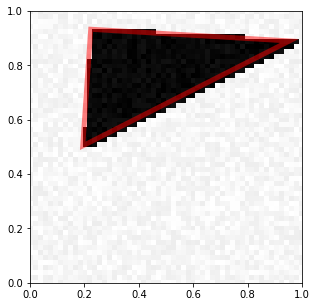

In [145]:
#We check how the Y_train works without normalizing the values. Normally it's fine.
visualize_prediction(X_train_6[0], Y_train_6[0])

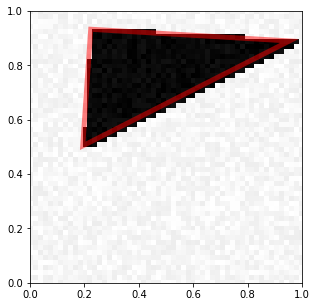

In [146]:
#We check after the normalization of the values of Y_train. It's the same but now the values are normalize
#This will help in the Network.
visualize_prediction(X_train_6[0], Y_train_norm[0])

We can see that our sorting with the vertices didn't affect our information. We just organize the vertices so now we can start to work with the images as input to predict the vertices (red lines around the triangle).

In [167]:
#we keep the same arquitecture of the previous question but our output changes to 6 due to the is 2 coordinates
#for each vertices of the triangle.

from keras.layers import Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

# Initializes a sequential model
model_ada6 = Sequential()
# First layer
model_ada6.add(Conv2D(32, kernel_size = 5, activation='relu', input_shape=(72,72,1)))
#We include the Pool of 2x2 for the model
#model_ada6.add(BatchNormalization())
model_ada6.add(MaxPooling2D(2))
#model_ada6.add(BatchNormalization())
# Second layer
model_ada6.add(Conv2D(64, kernel_size = 5, activation='relu', batch_size = 32))
#model_ada6.add(BatchNormalization())
model_ada6.add(MaxPooling2D(2))
#model_ada6.add(BatchNormalization())
# Second layer
model_ada6.add(Conv2D(128, kernel_size = 5, activation='relu', batch_size = 32))
# Third Layer
model_ada6.add(Flatten())
model_ada6.add(Dense(128, activation='relu', batch_size =32))
model_ada6.add(Dropout(0.5))
# We add the normalization before the output of the network
#model_ada6.add(BatchNormalization())
# Output layer
model_ada6.add(Dense(6, batch_size = 32))

In [168]:
# Compile the model for an Adam Optimizer
model_ada6.compile(optimizer='Adam', loss='mean_squared_error', metrics=['accuracy'])

In [169]:
# Fit the model
model_ada6.fit(X_train_6,Y_train_norm, validation_split=0.2, epochs=35, batch_size = 32)

Train on 400 samples, validate on 100 samples
Epoch 1/35
400/400 [==============================] - 4s 9ms/step - loss: 0.8780 - acc: 0.2375 - val_loss: 0.0915 - val_acc: 0.5100
Epoch 2/35
400/400 [==============================] - 3s 6ms/step - loss: 0.1089 - acc: 0.3250 - val_loss: 0.0588 - val_acc: 0.5100
Epoch 3/35
400/400 [==============================] - 3s 6ms/step - loss: 0.0956 - acc: 0.3450 - val_loss: 0.0523 - val_acc: 0.5100
Epoch 4/35
400/400 [==============================] - 2s 6ms/step - loss: 0.0768 - acc: 0.4400 - val_loss: 0.0427 - val_acc: 0.5300
Epoch 5/35
400/400 [==============================] - 3s 6ms/step - loss: 0.0740 - acc: 0.4175 - val_loss: 0.0361 - val_acc: 0.5200
Epoch 6/35
400/400 [==============================] - 3s 6ms/step - loss: 0.0675 - acc: 0.4575 - val_loss: 0.0345 - val_acc: 0.5600
Epoch 7/35
400/400 [==============================] - 3s 6ms/step - loss: 0.0683 - acc: 0.4625 - val_loss: 0.0382 - val_acc: 0.5600
Epoch 8/35
400/400 [==========

In [170]:
#We make predictions for the regression model
result_predict_ada6 = model_ada6.predict(X_test_6)

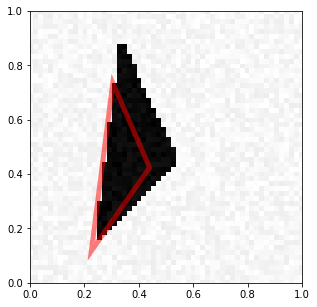

None


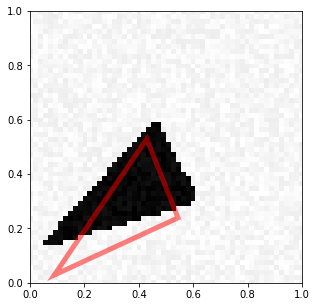

None


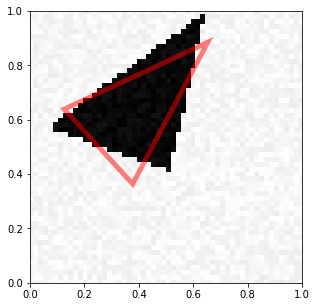

None


In [172]:
print(visualize_prediction(X_test_6[2], result_predict_ada6[2]))
print(visualize_prediction(X_test_6[14], result_predict_ada6[14]))
print(visualize_prediction(X_test_6[17], result_predict_ada6[17]))

As we can see in the results, we are close to the solution. When we apply sort to the vertices of the triangles, it helped to work with the prediction of them. It'st still not a perfect result but we are close.

# 7 Image Denoising

In [195]:
#We generate new functions considering the noise by default.
# On some implementations of matplotlib, you may need to change this value
IMAGE_SIZE = 72

#We generate new functions considering the noise by default.
#The first function will consider two outputs by default, one with noise and one without noise.
def generate_a_drawing_noise(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
#We generate the another output but in this case with noise.
    imdata_noise = imdata + noise*np.random.random(imdata.size)
    plt.close(fig)
    return imdata_noise, imdata

#In this case, we know that the last line does the drawing, so because we changed the previous function to
#give two outputs: one with noise and one without noise. We include the noise by default in 200.
def generate_a_rectangle_noise(noise=0.0, free_location=False):
    figsize = 1.0
    noise_r = 100*np.random.random()
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing_noise(figsize, U, V, noise_r)

#Same as the function of rectangle, we assigned a default noise and function "generate_a_drawing" will have two outputs
def generate_a_disk_noise(noise=0.0, free_location=False):
    figsize = 1.0
    noise_r = 100*np.random.random()
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing_noise(figsize, U, V, noise_r)

#For the case of triangle, we need to change the output including the noise figure in imdata[1].
def generate_a_triangle_noise(noise=0.0, free_location=False):
    figsize = 1.0
    noise_r = 100*np.random.random()
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    return generate_a_drawing_noise(figsize, U, V, noise_r)

#Include by default the noise of 200. Also we include the ouput of noise for rectangle, disk and triangle.
def generate_dataset_classification_noise(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle_noise()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples,im_size])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 100 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            rectangle = generate_a_rectangle_noise(noise = 0.0, free_location = False)
            #We split the output for X with noise and Y with noise.
            X[i] = rectangle[0] /255
            Y[i] = rectangle[1] /255
        elif category == 1:
            disk = generate_a_disk_noise(noise, free_location = False)
            #We split the output for X with noise and Y with noise.
            X[i] = disk[0] / 255
            Y[i] = disk[1] / 255
        else:
            #We split the output for X with noise and Y with noise.
            triangle = generate_a_triangle_noise(noise = 0.0, free_location = False)
            X[i] = triangle[0] / 255
            Y[i] = triangle[1] / 255
        #Y[i] = X[i][0]
     #We don't need this line anymore because the noise is always there.   
    #X = (X[i][1] + noise) / (255 + 2 * noise)
    return [X, Y]

def generate_test_set_classification_noise():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_classification_noise(150, noise=0.0, free_location = False)
    #We don't need this line anymore.
    #Y_test = np_utils.to_categorical(Y_test, 3)
    return [X_test, Y_test]

Now we validate that for each function there is a respective graph with noise in the output.

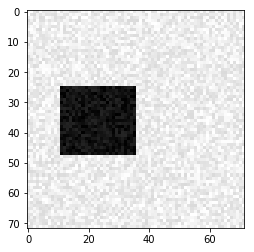

In [196]:
#Now we validate that the function is working correctly for rectangle.
im = generate_a_rectangle_noise(10, True)
plt.imshow(im[0].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

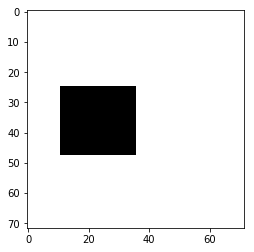

In [197]:
plt.imshow(im[1].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

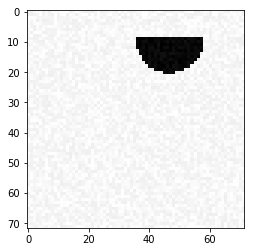

In [198]:
#We validate that the function is working correctly for the disk.
im = generate_a_disk_noise(200, True)
plt.imshow(im[0].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

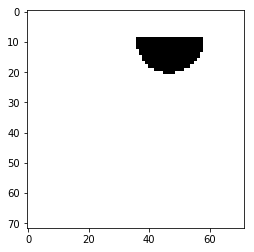

In [199]:
plt.imshow(im[1].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

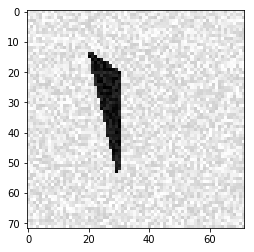

In [200]:
#We validate that the function is working correctly for triangle.
im = generate_a_triangle_noise(200, True)
plt.imshow(im[0].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

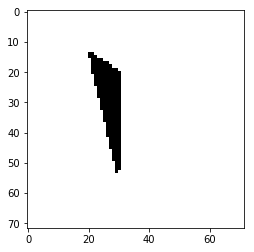

In [201]:
plt.imshow(im[1].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

We can see that the information of the functions work and that the figures are distributed with:
 X - Information with noise
 Y - Information without noise.

With this we can start working in the Problem given to predict the image without noise.

In [202]:
#Based on our validation, now we generate the Dataset for 
#We generate the training set for the Classification Problem with 300 images with noise in X and without noise in Y.
[X_train_7, Y_train_7] = generate_dataset_classification_noise(1000, 100, False)

#We also generate the Test Set for the Classification Problem
[X_test_7, Y_test_7] = generate_test_set_classification_noise()

Creating data:
0
100
200
300
400
500
600
700
800
900
Creating data:
0
100


In [203]:
#We see that the images of 72 x 72 pixels are well defined in X and Y for Train and Test respectively.
print(X_train_7.shape)
print(Y_train_7.shape)
print(X_test_7.shape)
print(Y_test_7.shape)

(1000, 5184)
(1000, 5184)
(150, 5184)
(150, 5184)


In [204]:
#Time to create the model. We will try to build a model considering a Convolutional Network
#and then apply upsampling to get back the graph.
#We reshape the X and Y for Train and Test according to our new model.
X_train_7 = X_train_7.reshape(X_train_7.shape[0],72,72,1)
Y_train_7 = Y_train_7.reshape(Y_train_7.shape[0],72,72,1)

#We reshape the Test data to use it later for the predictions.
X_test_7 = X_test_7.reshape(X_test_7.shape[0],72,72,1)
Y_test_7 = Y_test_7.reshape(Y_test_7.shape[0],72,72,1)

In [25]:
#We see that the images of 72 x 72 pixels are well defined in X and Y for Train and Test respectively.
print(X_train_7.shape)
print(Y_train_7.shape)
print(X_test_7.shape)
print(Y_test_7.shape)

(300, 72, 72, 1)
(300, 72, 72, 1)
(150, 72, 72, 1)
(150, 72, 72, 1)


In [214]:
#we keep the same arquitecture of the previous question but our output changes to 6 due to the is 2 coordinates
#for each vertices of the triangle.
#We will apply padding to every layer so we can mantain the size of the image in every layer despite we use the convolution.
#We add the normalization before the output of the network

from keras.layers import Conv2D, MaxPooling2D, Flatten, BatchNormalization, UpSampling2D
from keras.models import Sequential

# Initializes a sequential model
model_ada7 = Sequential()
# First layer
model_ada7.add(Conv2D(32, (3,3), activation='relu', input_shape=(72,72,1), padding='same'))
#We include the Pool of 2x2 for the model
model_ada7.add(MaxPooling2D((2), padding = 'same'))
print(model_ada7.output_shape)
#model_ada7.add(BatchNormalization())
# Second layer
model_ada7.add(Conv2D(64, kernel_size = 3, activation='relu', padding='same'))
model_ada7.add(MaxPooling2D((2), padding = 'same'))
print(model_ada7.output_shape)
#model_ada7.add(BatchNormalization())
# Third Layer
model_ada7.add(Conv2D(128, kernel_size = 3, activation='relu', padding='same'))
model_ada7.add(MaxPooling2D((2), padding = 'same'))
print(model_ada7.output_shape)
#model_ada7.add(BatchNormalization())

#Now we apply upsampling to go back to the image
model_ada7.add(UpSampling2D(size = (2,2)))

#First Layer to go back
model_ada7.add(Conv2D(64, kernel_size = 3, activation='relu', padding='same'))
print(model_ada7.output_shape)
#model_ada7.add(BatchNormalization())
#Second Layer to go back
model_ada7.add(UpSampling2D(size = (2,2)))
model_ada7.add(Conv2D(32, kernel_size = 3, activation='relu', padding='same'))
print(model_ada7.output_shape)
#model_ada7.add(BatchNormalization())
#Third Layer to go back
model_ada7.add(UpSampling2D(size = (2,2)))
model_ada7.add(Conv2D(1, kernel_size = 3, padding='same'))
print(model_ada7.output_shape)

(None, 36, 36, 32)
(None, 18, 18, 64)
(None, 9, 9, 128)
(None, 18, 18, 64)
(None, 36, 36, 32)
(None, 72, 72, 1)


In [215]:
#Compile the model for an Adam Optimizer
model_ada7.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [216]:
# Fit the model
model_ada7.fit(X_train_7,Y_train_7, validation_split=0.3, epochs=3, batch_size = 32)

Train on 700 samples, validate on 300 samples
Epoch 1/3
700/700 [==============================] - 11s 16ms/step - loss: 0.1361 - acc: 0.8261 - val_loss: 0.0403 - val_acc: 0.9676
Epoch 2/3
700/700 [==============================] - 10s 14ms/step - loss: 0.0273 - acc: 0.9819 - val_loss: 0.0211 - val_acc: 0.9864
Epoch 3/3
700/700 [==============================] - 10s 14ms/step - loss: 0.0157 - acc: 0.9881 - val_loss: 0.0134 - val_acc: 0.9899


In [217]:
#We make predictions for the regression model
result_predict_ada7 = model_ada7.predict(X_test_7)

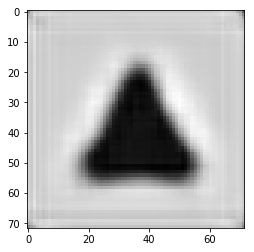

In [218]:
#This is the Y_Prediction Figure (without noise)
plt.imshow(result_predict_ada7[1].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

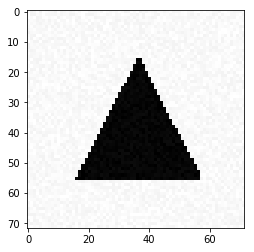

In [219]:
#This is the X_Test Figure (with noise)
plt.imshow(X_test_7[1].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

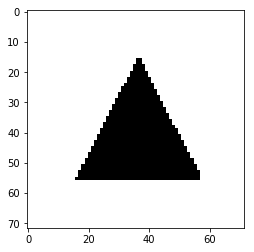

In [220]:
#This is the Y_Test Figure (without noise)
plt.imshow(Y_test_7[1].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

As we can see, the image is kind of blurry because there was noise that couldn't let us predict all the information of the image (we can't ignore it completely). We have a good approximation of the real result without noise.